# Disney Movies

In this project, I will analyse data which is related to Disney movies to know more about it.

This project will answer some questions like:

- What is the number of movies per genre?
- What is the top 10 movies which have huge total gross?
- What is the number of movies per MPAA rating?
    
    


## Accessing and exploring the data

We have 5 files:

- disney_characters.
- disney_director.
- disney_movies_total_gross.
- disney_revenue_1991_2016.
- disney_voice_actors.

Let's access (disney_movies_total_gross) file because it has our scope of answers.


In [1]:
#Access file using pandas to import file in the form of dataframe
import pandas as pd
df = pd.read_csv('D:\Data Science\Disney Data\kgarrett-disney-character-success-00-16\data\disney_movies_total_gross.csv')

In [2]:
#Print top 5 rows of df
df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [3]:
#Know how many rows and column in the df
df.shape

(579, 6)

In [4]:
#Know more information about our df such as column, number of its non-null values and its data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [5]:
#Know about number of duplicated rows
df.duplicated().sum()

0

In [6]:
df['movie_title'].duplicated().sum()

6

In [7]:
#Know about number of null values
df.isna().sum()

movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [8]:
#Know about the number of unique values
df.nunique()

movie_title                 573
release_date                553
genre                        12
mpaa_rating                   5
total_gross                 576
inflation_adjusted_gross    576
dtype: int64

In [9]:
#Explore genres of movies
df['genre'].value_counts()

Comedy                 182
Adventure              129
Drama                  114
Action                  40
Thriller/Suspense       24
Romantic Comedy         23
Documentary             16
Musical                 16
Western                  7
Horror                   6
Black Comedy             3
Concert/Performance      2
Name: genre, dtype: int64

In [10]:
#Explore types of rating
df['mpaa_rating'].value_counts()

PG           187
PG-13        145
R            102
G             86
Not Rated      3
Name: mpaa_rating, dtype: int64

## Cleaning The Data File

After accessing and exploring the data file to know more about data and define the problems, Let's say that we need to:

- Rename (mpaa_rating) column to (rating), That's will be more easy.
- Drop rows which have null values in (mpaa_rating) and (genre) column.
- Convert data type of (release_date) column to datetime.
- Make (mpaa_rating) column data more understandable by rename rating levels.

Let's start!

### Rename Column

In [11]:
#Load data
import pandas as pd
df = pd.read_csv('D:\Data Science\Disney Data\kgarrett-disney-character-success-00-16\data\disney_movies_total_gross.csv')

In [12]:
#Rename (mpaa_rating) column to (rating)
df.rename(columns={'mpaa_rating' : 'age_rating'}, inplace=True)

In [13]:
#See changes
df.head(1)

,movie_title,release_date,genre,age_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251


### Drop Null Values

In [14]:
#Define number of rows which have null values in (age_rating) and (genre) columns
df.isna().sum()

movie_title                  0
release_date                 0
genre                       17
age_rating                  56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [15]:
#Drop null values rows
df.dropna(inplace=True)

In [16]:
#Check if rows with null values removed. Expected output is False
df.isna().sum().any()

False

In [17]:
df.shape

(513, 6)

### Fix Data Type

In [18]:
#Convert data type of (release_date) column to datetime.
df['release_date'] = pd.to_datetime(df['release_date'])

In [19]:
#Check changes in data type of ( release_date) column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   movie_title               513 non-null    object        
 1   release_date              513 non-null    datetime64[ns]
 2   genre                     513 non-null    object        
 3   age_rating                513 non-null    object        
 4   total_gross               513 non-null    int64         
 5   inflation_adjusted_gross  513 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 28.1+ KB


In [20]:
df.dtypes

movie_title                         object
release_date                datetime64[ns]
genre                               object
age_rating                          object
total_gross                          int64
inflation_adjusted_gross             int64
dtype: object

### Make Column Meaning More Clearly

In [21]:
#Make (age_rating) column data more understandable by rename rating levels.

#PG    --> Parental Guidance Suggested  --> (Parent Guidance)
#PG-13 --> Parents Strongly Cautioned   --> (+13 & Parent Guidance)
#R     --> Restricted Under 17 requires accompanying parent or adult guardian --> (-17 & Parent Guidance)
#G     --> General Audiences --> (All)
#Not Rated

df['age_rating'].value_counts()

PG           185
PG-13        141
R             98
G             86
Not Rated      3
Name: age_rating, dtype: int64

In [22]:
#Replace values in (age_rating) to another values which explained above
df['age_rating'].replace({"PG":"Parent Guidance", "PG-13":"+13 & Parent Guidance", "R":"-17 & Parent Guidance", "G":"All"}, inplace=True)

In [23]:
df.tail()

,movie_title,release_date,genre,age_rating,total_gross,inflation_adjusted_gross
574,The Light Between Oceans,2016-09-02,Drama,+13 & Parent Guidance,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,Parent Guidance,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,+13 & Parent Guidance,232532923,232532923
577,Moana,2016-11-23,Adventure,Parent Guidance,246082029,246082029
578,Rogue One: A Star Wars Story,2016-12-16,Adventure,+13 & Parent Guidance,529483936,529483936


In [24]:
#Check changes
df['age_rating'].value_counts()

Parent Guidance          185
+13 & Parent Guidance    141
-17 & Parent Guidance     98
All                       86
Not Rated                  3
Name: age_rating, dtype: int64

In [25]:
#Save our clean data to new file
df.to_csv('D:\Data Science\Disney Data\kgarrett-disney-character-success-00-16\data\clean_disney_data.csv')

## Exploring Data File with Visuals

In [26]:
#Load dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_movies = pd.read_csv('D:\Data Science\Disney Data\kgarrett-disney-character-success-00-16\data\clean_disney_data.csv')

Text(0.5, 1.0, 'The Number of Movies per Genre')

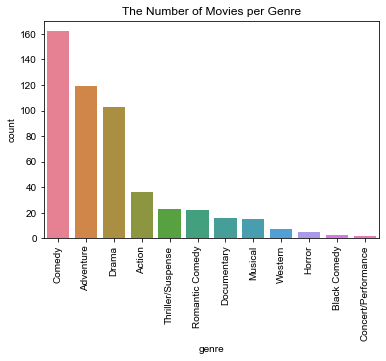

In [27]:
#Explore the number of movies per genre
sns.countplot(x='genre', data=df_movies, order=df_movies['genre'].value_counts().index, palette='husl')
sns.set(rc = {'figure.figsize':(10,5)})
plt.xticks(rotation=90)
plt.title("The Number of Movies per Genre")

Disney interested more about comedy movies because it produced 162 comedy movies of the total movies.

In [28]:
#Top 10 total gross movies
df_movies.nlargest(10, ['total_gross', 'inflation_adjusted_gross'])

,Unnamed: 0,movie_title,release_date,genre,age_rating,total_gross,inflation_adjusted_gross
498,564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,+13 & Parent Guidance,936662225,936662225
458,524,The Avengers,2012-05-04,Action,+13 & Parent Guidance,623279547,660081224
512,578,Rogue One: A Star Wars Story,2016-12-16,Adventure,+13 & Parent Guidance,529483936,529483936
505,571,Finding Dory,2016-06-17,Adventure,Parent Guidance,486295561,486295561
492,558,Avengers: Age of Ultron,2015-05-01,Action,+13 & Parent Guidance,459005868,459005868
375,441,Pirates of the Caribbean: Dead Man’…,2006-07-07,Adventure,+13 & Parent Guidance,423315812,544817142
118,179,The Lion King,1994-06-15,Adventure,All,422780140,761640898
433,499,Toy Story 3,2010-06-18,Adventure,All,415004880,443408255
466,532,Iron Man 3,2013-05-03,Action,+13 & Parent Guidance,408992272,424084233
503,569,Captain America: Civil War,2016-05-06,Action,+13 & Parent Guidance,408084349,408084349


 Top 10 total gross movies. As "Star Wars Ep.VII: The Force Awakens" movie was the largest total gross with 936,662,225$.

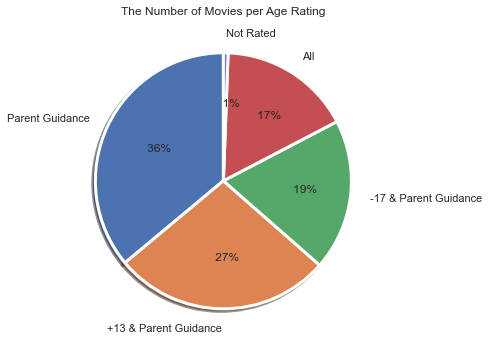

In [29]:
#Number of movies per age rating as we know above:
#Parent Guidance          185
#+13 & Parent Guidance    141
#-17 & Parent Guidance     98
#All                       86
#Not Rated                  3

slices = [185, 141, 98, 86, 3]
labels = ['Parent Guidance', '+13 & Parent Guidance', '-17 & Parent Guidance', 'All', 'Not Rated']
plt.pie(slices, labels=labels, shadow=True, startangle=90, autopct='%5.0f%%',
        labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

plt.title("The Number of Movies per Age Rating")
plt.tight_layout()
plt.show()

 Large number of Disney movies suggested to watch with parental guidance.

## Conclusion:

- Disney interested more about comedy movies because it produced 162 comedy movies of the total movies.
- "Star Wars Ep.VII: The Force Awakens" movie was the largest total gross with 936,662,225$.
- Large number of Disney movies suggested to watch with parental guidance.